<a href="https://colab.research.google.com/github/240609/MLF/blob/main/HyperparameterTuning/FFNN_ImageClass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**0. Import libraries + 1. Load the Dataset**

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from tensorflow.keras.layers import Dropout
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.optimizers import Adagrad
from keras.datasets import cifar10
from keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import cv2

font = {'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

labels = {0:'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}



**2. Data Examination**

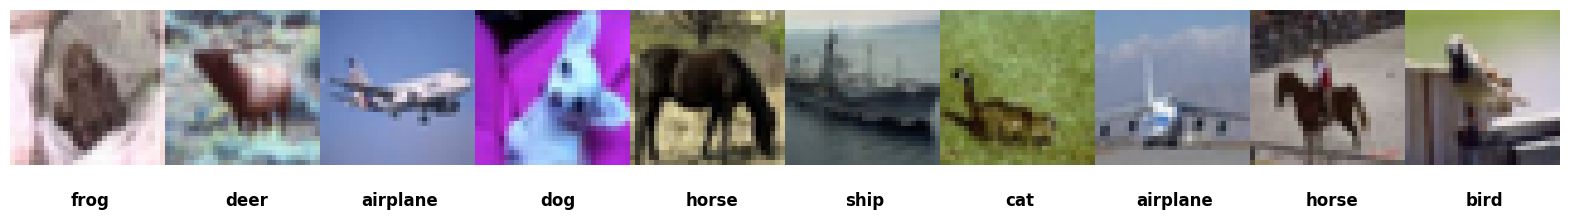

(50000, 32, 32, 3)

In [18]:
def display_random_images(x_data: np.array, y_data: np.array, count: int = 10) -> None:
  index = np.array(len(x_data))
  selected_ind = np.random.choice(index, count)

  selected_img = x_data[selected_ind]
  selected_labels_encoded = y_data[selected_ind]
  selected_labels = [labels[x[0]] for x in selected_labels_encoded]

  concat_img = np.concatenate(selected_img, axis=1)

  plt.figure(figsize=(20,10))
  plt.imshow(concat_img)

  for id_label, label in enumerate(selected_labels):
    plt.text((32/2) + 32*id_label - len(label), 32*(5/4), label)
  plt.axis('off')
  plt.show()

display_random_images(X_train, y_train)
X_train.shape

<Figure size 640x480 with 0 Axes>

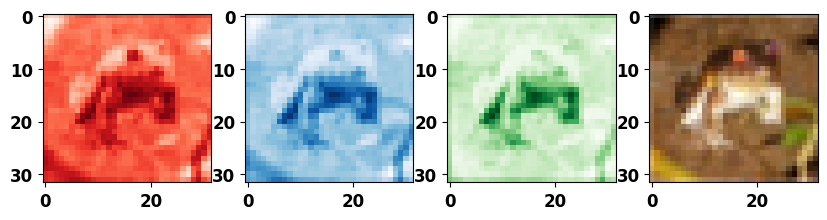

In [19]:
def display_channels_separately(image: np.array) -> None:

  plt.figure()
  fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(10, 5))


  axs[0].imshow(image[:,:,0],cmap='Reds')
  axs[1].imshow(image[:,:,1],cmap='Blues')
  axs[2].imshow(image[:,:,2],cmap='Greens')

  axs[3].imshow(image)

  plt.show()

display_channels_separately(X_train[0])

**3. Preprocessing of the images**


In [20]:
X_train_scaled = X_train.astype('float32') / 255.0

y_train_encoded = to_categorical(y_train, num_classes=10)

**4. Define the model architecture**

In [21]:
model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.add(Dropout(0.3))
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

model.summary()

optimizer = Adagrad(learning_rate = 0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │           5,130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,841,162 (7.02 MB)

 Trainable params: 1,841,162 (7.02 MB)

 Non-trainable params: 0 (0.00 B)

**5. Train the model**

In [22]:
history = model.fit(X_train_scaled, y_train_encoded, epochs=35, batch_size=64, validation_split = 0.2, callbacks=[early_stopping])

Epoch 1/35
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 27ms/step - accuracy: 0.2318 - loss: nan - val_accuracy: 0.3673 - val_loss: 1.7823
Epoch 2/35
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - accuracy: 0.3145 - loss: 5.8047 - val_accuracy: 0.3801 - val_loss: 1.7344
Epoch 3/35
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.3346 - loss: 5.7791 - val_accuracy: 0.4129 - val_loss: 1.6666
Epoch 4/35
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.3555 - loss: nan - val_accuracy: 0.4219 - val_loss: 1.6216
Epoch 5/35
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - accuracy: 0.3643 - loss: 5.7038 - val_accuracy: 0.4186 - val_loss: 1.6224
Epoch 6/35
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 26ms/step - accuracy: 0.3770 - loss: 5.6633 - val_accuracy: 0.4564 - val_loss: 1.5481
Epoch 7/35
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.3736 - loss: 5.8471 - val_accuracy: 0.4441 - val_loss: 1.5632
Epoch 8/35
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.3883 - loss: 5.6343 - val_ac

**6. Model evaluation**

Test loss: 1.3500832319259644
Test accuracy: 52.27000117301941 %


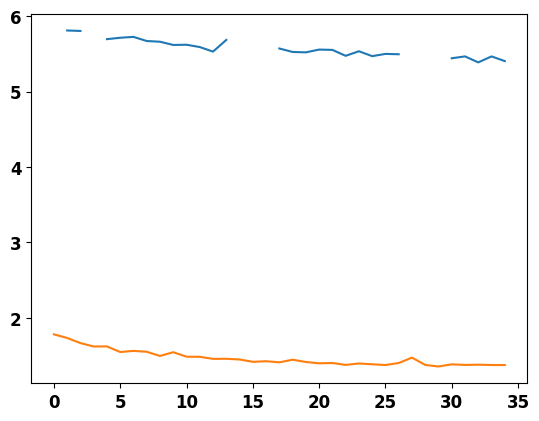

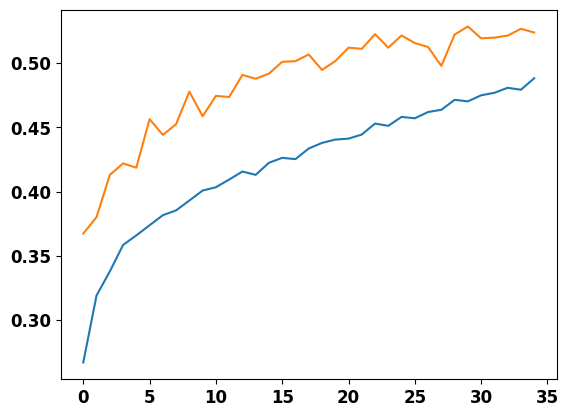

In [23]:
X_test = X_test.astype('float32') / 255.0
y_test_encoded = to_categorical(y_test, num_classes=10)

score = model.evaluate(X_test, y_test_encoded, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: {score[1]*100} %')

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


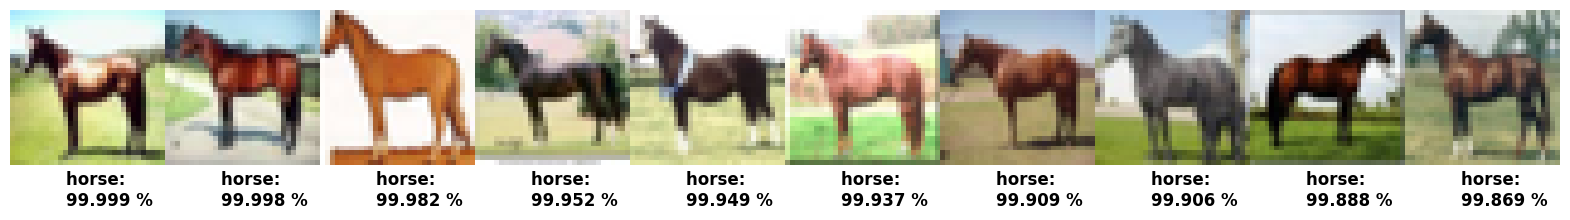

In [24]:
def show_the_best_predictions(model, x_test: np.array, y_test: np.array, n_of_pred: int = 10) -> None:
  mapping = {0:'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}

  predictions = model.predict(x_test)
  y_test = y_test.reshape(1,-1)
  predictions_ind = np.argmax(predictions, axis=1)
  predictions_ind = predictions_ind.reshape(1, -1)

  corect_predictions = np.where(predictions_ind == y_test)

  rows_correct = corect_predictions[1]
  predictedtions_correct = predictions[rows_correct]
  target_correct = y_test[0][rows_correct]

  max_samples = predictions[rows_correct, target_correct]
  selected_images = x_test[rows_correct]
  sorted_ind = np.argsort(max_samples)[::-1]


  images = []
  prob = []
  labels = []


  for ind in range(n_of_pred):

    index = sorted_ind[ind]

    labels.append(target_correct[index])
    prob.append(max_samples[index])
    images.append(selected_images[index])

  plt.figure(figsize=(20,10))

  images = np.concatenate(np.asarray(images),axis=1)
  plt.imshow(images)
  for ins in range(n_of_pred):
    texts = '{}: \n{:.3f} %'.format(mapping[labels[ins]], prob[ins]*100)
    plt.text((32/2) + 32*ins - len(mapping[labels[ins]]), 32*(5/4), texts)

  plt.axis('off')
  plt.show()

show_the_best_predictions(model, X_test, y_test)

# **Task**

**Hyperparameters changes:** (original => latest)

number of neurons in the hidden layer: 128 => 512

number of hidden layers: 1 => 2

activation functions: sigmoid => relu

learning rate: 0.001 => 0.01

optimizer: SGD => Adagrad

number of learning epochs: 20 => 35

batch size: 128 => 64

**Regularization:**

Dropout(0.3)

EarlyStopping(monitor='val_loss', patience=5)

**Accuracy**

30,4 % => 52,3 %
